In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')
#genome_score = pd.read_csv('genome-scores.csv')
#genome_tag = pd.read_csv('genome-tags.csv')

In [4]:
tags.describe(include='all')
ratings.describe(include='all')

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


In [6]:
print('----ratings----')
print(ratings.dtypes)
print('----tags----')
print(tags.dtypes)
print('----movies----')
print(movies.dtypes)
print('----links----')
"""
print(links.dtypes)
print('----genome_score----')
print(genome_score.dtypes)
print('----genome_tag----')
print(genome_tag.dtypes)
"""

----ratings----
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
----tags----
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
----movies----
movieId     int64
title      object
genres     object
dtype: object
----links----


"\nprint(links.dtypes)\nprint('----genome_score----')\nprint(genome_score.dtypes)\nprint('----genome_tag----')\nprint(genome_tag.dtypes)\n"

In [7]:
# Changing the timstamp column from the integer values to actual time

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit = 's')
tags['timestamp'] = pd.to_datetime(tags['timestamp'],unit = 's')

In [8]:
ratings['rating'] = ratings['rating'].astype('float')

In [9]:
movies.describe(include='all')

,movieId,title,genres
count,86537.000000,86537,86537
unique,NaN,86330,1796
top,NaN,Alone (2020),Drama
freq,NaN,4,12246
mean,155932.817096,NaN,NaN
std,78037.145347,NaN,NaN
min,1.000000,NaN,NaN
25%,111443.000000,NaN,NaN
50%,164574.000000,NaN,NaN
75%,211225.000000,NaN,NaN


In [10]:
print(tags.isnull().sum())
print(links.isnull().sum())
print(movies.isnull().sum())

userId        0
movieId       0
tag          17
timestamp     0
dtype: int64
movieId      0
imdbId       0
tmdbId     126
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [11]:
#identified the columns which has null values. Handling Null values in the dataset with fillna function

links['tmdbId'].fillna(0, inplace=True)
links['tmdbId'] = links['tmdbId'].astype('int')

tags['tag'].fillna('No Comment', inplace= True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9436\3111038886.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  links['tmdbId'].fillna(0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9436\3111038886.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [12]:
#merging ratings and movie dataset

movie_rating = pd.merge(ratings,movies,on='movieId')

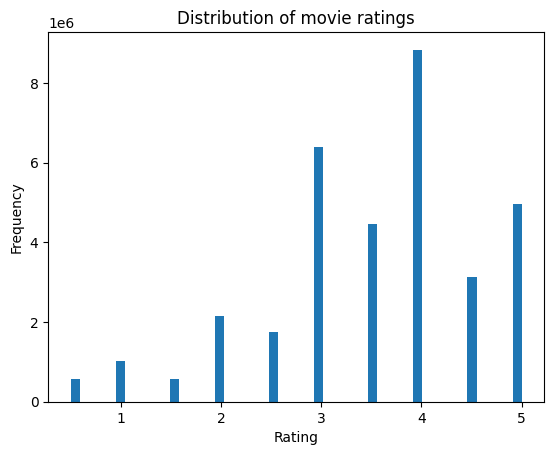

In [13]:
plt.hist(movie_rating['rating'],bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of movie ratings')
plt.show()

In [14]:
movie_rating_mean = movie_rating.groupby('movieId')['rating'].mean().sort_values(ascending=False)
print(movie_rating_mean)
#movie_rating['rating'] = movie_rating['rating'].astype('float')

movieId
267038    5.0
282157    5.0
281624    5.0
251222    5.0
246624    5.0
         ... 
277410    0.5
162072    0.5
143661    0.5
258307    0.5
261303    0.5
Name: rating, Length: 83239, dtype: float64


In [ ]:
#Genre Analysis
movies['genres'] = movies['genres'].str.split('|')
movie_genre = movies.explode('genres')
genre_rating = pd.merge(movie_genre,movie_rating_mean,on='movieId')
genre_rating = genre_rating.groupby('genres')['rating'].mean().reset_index()

print(genre_rating)

In [21]:
#review_count = movie_rating.groupby('movieId','rating')['userId'].count()

movie_rating.describe(include='all')

,userId,movieId,rating,timestamp,title,genres
count,3.383216e+07,3.383216e+07,3.383216e+07,33832162,33832162,33832162
unique,NaN,NaN,NaN,NaN,83043,1779
top,NaN,NaN,NaN,NaN,"Shawshank Redemption, The (1994)",Drama
freq,NaN,NaN,NaN,NaN,122296,2382797
mean,1.654380e+05,2.831348e+04,3.542540e+00,2010-03-23 16:27:56.735719936,NaN,NaN
min,1.000000e+00,1.000000e+00,5.000000e-01,1995-01-09 11:46:44,NaN,NaN
25%,8.295300e+04,1.219000e+03,3.000000e+00,2003-03-03 18:56:32,NaN,NaN
50%,1.661290e+05,3.263000e+03,4.000000e+00,2010-01-29 04:42:24,NaN,NaN
75%,2.474500e+05,4.049100e+04,4.000000e+00,2017-06-08 10:56:19.249999872,NaN,NaN
max,3.309750e+05,2.889830e+05,5.000000e+00,2023-07-20 08:53:33,NaN,NaN
